In [3]:
import pandas as pd
import numpy as np
import seaborn as sns

In [29]:
%cd /Users/yuqizheng/Downloads/
attractions =  pd.read_csv("attractions.csv")
ferris =  pd.read_csv("ferris_bueller.csv")

/Users/yuqizheng/Downloads


Part I: Market Segmentation

In [5]:
attractions.head()

,userID,tallscary,coasterdrop,coasterloop,waterslide,wavepool,restaurants,openspaces,giftshop,smoothrides,child_rides
0,1,4,6,5,3,2,6,4,1,6,6
1,2,3,6,5,3,4,4,4,1,6,4
2,3,4,6,3,4,5,6,3,1,3,5
3,4,6,6,4,4,6,6,4,3,0,2
4,5,4,6,4,4,1,6,4,0,6,6


In [6]:
attractions.drop('userID',1,inplace=True)

In [7]:
attractions.head()

,tallscary,coasterdrop,coasterloop,waterslide,wavepool,restaurants,openspaces,giftshop,smoothrides,child_rides
0,4,6,5,3,2,6,4,1,6,6
1,3,6,5,3,4,4,4,1,6,4
2,4,6,3,4,5,6,3,1,3,5
3,6,6,4,4,6,6,4,3,0,2
4,4,6,4,4,1,6,4,0,6,6


(10.0, 0.0)

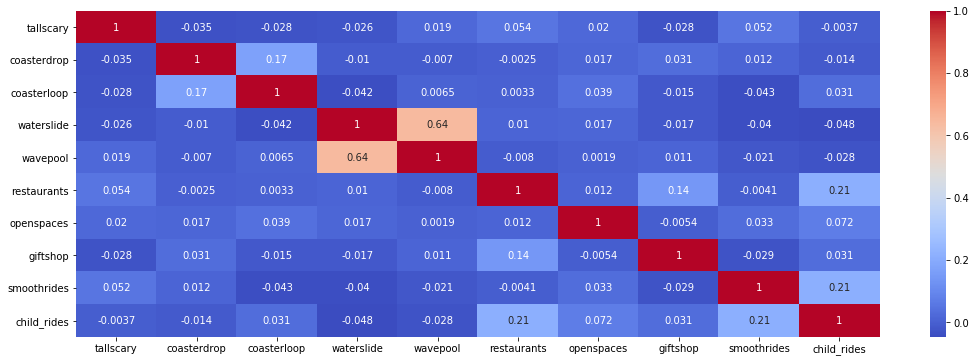

In [18]:
import matplotlib.pyplot as plt
corr = attractions.corr()
plt.figure(figsize=(18,6))
plot_ = sns.heatmap(corr, annot=True, cmap="coolwarm")
bottom, top = plot_.get_ylim()
plot_.set_ylim(bottom + 0.5, top - 0.5)

Question A: Through this heatmap, we can see the correlation between wavepool and waterslide is 0.64 which is higher than most of other pairs. Since wave pools are often a major feature of water parks, so it is reasonable have a high correlation with the waterslide. We also notice the second high correlation are between child_rides-restaurants and child_rides-smoothrides, both of the two pairs's correlation are 0.21. Because children need more rest and energy through meals than adults, and children can only play simple rides. As a result, the more children there are, the more restaurants and smooth rides increase.

In [19]:
attractions.describe()

,tallscary,coasterdrop,coasterloop,waterslide,wavepool,restaurants,openspaces,giftshop,smoothrides,child_rides
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000
mean,4.470000,5.710000,4.651000,4.097000,3.617000,4.639000,4.264000,1.241000,3.53800,4.293000
std,1.103775,0.515913,0.921981,1.102182,2.241726,1.306287,0.969146,1.448108,1.63806,1.651023
min,0.000000,4.000000,2.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.00000,0.000000
25%,4.000000,5.000000,4.000000,3.000000,2.000000,4.000000,4.000000,0.000000,2.00000,3.000000
50%,4.000000,6.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000,4.00000,5.000000
75%,5.000000,6.000000,5.000000,5.000000,6.000000,6.000000,5.000000,2.000000,5.00000,6.000000
max,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.00000,6.000000


In [23]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(attractions)
attractions_n = scaler.transform(attractions)
attractions_n= pd.DataFrame(data=attractions_n, index=attractions.index, columns=attractions
.columns)
print(attractions_n.describe().round(2))

       tallscary  coasterdrop  coasterloop  waterslide  wavepool  restaurants  \
count    1000.00      1000.00      1000.00     1000.00   1000.00      1000.00   
mean        0.00        -0.00         0.00       -0.00      0.00        -0.00   
std         1.00         1.00         1.00        1.00      1.00         1.00   
min        -4.05        -3.32        -2.88       -2.81     -1.61        -3.55   
25%        -0.43        -1.38        -0.71       -1.00     -0.72        -0.49   
50%        -0.43         0.56         0.38       -0.09      0.17         0.28   
75%         0.48         0.56         0.38        0.82      1.06         1.04   
max         1.39         0.56         1.46        1.73      1.06         1.04   

       openspaces  giftshop  smoothrides  child_rides  
count     1000.00   1000.00      1000.00      1000.00  
mean        -0.00     -0.00        -0.00        -0.00  
std          1.00      1.00         1.00         1.00  
min         -3.37     -0.86        -2.16      

Question B: No, the variables do not need to be standardized. Because all the variables on a scale of 0 to 6, which means they have the same data type.

In [72]:
from sklearn.cluster import KMeans

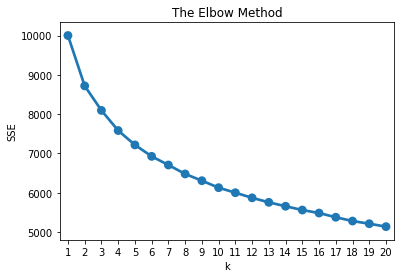

In [73]:
import matplotlib.pyplot as plt
sse = {}
for k in range(1, 21):
 kmeans = KMeans(n_clusters=k, random_state=654)
 kmeans.fit(attractions_n)
 sse[k] = kmeans.inertia_
plt.title('The Elbow Method')
plt.xlabel('k')
plt.ylabel('SSE')
sns.pointplot(x=list(sse.keys()), y=list(sse.values()));

In [74]:
kmeans = KMeans(n_clusters=2, random_state=654)
kmeans.fit(attractions_n)
cluster_labels = kmeans.labels_

Question D: From the Elbow Method graph above, the SSE dropped sharply between k=1 and k=2. Thus, the graph suggests us to use 2 clusters for this data set. 

In [75]:
attractionsx = attractions.assign(Cluster = cluster_labels)
attractionsx.groupby(['Cluster']).agg({
'tallscary': 'mean',
'coasterdrop': 'mean',
'coasterloop':'mean',
'waterslide':'mean',
'wavepool':'mean',
'restaurants':'mean',
'openspaces':'mean',
'giftshop':'mean',
'smoothrides':'mean',
'child_rides':'mean',
}).round(2)


,tallscary,coasterdrop,coasterloop,waterslide,wavepool,restaurants,openspaces,giftshop,smoothrides,child_rides
Cluster,,,,,,,,,,
0,4.48,5.72,4.66,3.19,1.53,4.65,4.28,1.25,3.60,4.34
1,4.46,5.70,4.65,4.85,5.34,4.63,4.25,1.23,3.49,4.26


Question G: 
Cluster 0: family group with kids don't enjoy water park
Cluster 1: family group with kids enjoy water park

Question H: For cluster 0, Lobster Land should put more budget in roller cosaters and safe rides because this cluster both like to use roller coasters and child rides. It is very obvious this cluster exist both adults and kids, therefore, restaurants would also be a good place for them to dining and have a rest. But this group of people fewer like to go to water park, I would like to suggest Lobster Land put more budget to construct various types of coasters and decorate restaurants more dreamy and childlike. For cluster 1, it is very similar as cluster 0 in coasters, smoothrides, child rides as well as restaurants. The only difference is people in cluster 1 enjoy water park a lot. Therefore, based on the above analytics, I think Lobster Land can increase the construction and investment of the water park, especially the wavepool, when targeting this group of people, because they are most interested in the facilities of the water park in addition to the coaster drop. In addition, we can build a retail stall next to wavepool, specializing in water park essentials such as swimwear, swimming caps, swimming glasses and swimming rings. Unlike giftshop, this retail store not only sells these water supplies, but also provides rental services. In addition, we can also build an automatic storage space so that customers who go to the water park can rent a locker to store their personal belongings for a very small fee.

Part II: Conjoint Analysis with a Linear Model

In [76]:
ferris.describe()

,paxpercar,height,totaltime,rating
count,432.000000,432.000000,432.000000,432.000000
mean,3.666667,200.000000,246.666667,5.748171
std,1.701644,81.744324,139.045470,2.365423
min,2.000000,100.000000,80.000000,1.010000
25%,2.000000,100.000000,80.000000,4.117500
50%,3.000000,200.000000,240.000000,5.950000
75%,6.000000,300.000000,420.000000,7.670000
max,6.000000,300.000000,420.000000,10.000000


In [77]:
ferris.head()

,paxpercar,height,opentop,totaltime,sway,color,rating
0,2,100,Y,80,Yes,Red,1.04
1,2,100,Y,80,Yes,Green,1.71
2,2,100,Y,80,Yes,Purple,4.42
3,2,100,Y,80,Yes,White,2.20
4,2,100,Y,80,No,Red,6.09


Question B: Based on the descriptions shown above, "paxpercar","height", "totaltime" and "rating" are numeric; "opentop", "sway" and "color" are categorical.

In [78]:
ferris2 = pd.get_dummies(ferris, drop_first=True, columns=['paxpercar', 'height','opentop','sway','color','totaltime'])
ferris2.columns

Index(['rating', 'paxpercar_3', 'paxpercar_6', 'height_200', 'height_300',
       'opentop_Y', 'sway_Yes', 'color_Purple', 'color_Red', 'color_White',
       'totaltime_240', 'totaltime_420'],
      dtype='object')

In [79]:
ferris2.head()

,rating,paxpercar_3,paxpercar_6,height_200,height_300,opentop_Y,sway_Yes,color_Purple,color_Red,color_White,totaltime_240,totaltime_420
0,1.04,0,0,0,0,1,1,0,1,0,0,0
1,1.71,0,0,0,0,1,1,0,0,0,0,0
2,4.42,0,0,0,0,1,1,1,0,0,0,0
3,2.20,0,0,0,0,1,1,0,0,1,0,0
4,6.09,0,0,0,0,1,0,0,1,0,0,0


In [80]:
x=ferris2[['paxpercar_3', 'paxpercar_6', 'height_200', 'height_300',
       'opentop_Y', 'sway_Yes', 'color_Purple', 'color_Red', 'color_White',
       'totaltime_240', 'totaltime_420']]

In [81]:
y=ferris2['rating']

In [82]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
regressor = LinearRegression()
regressor.fit(x, y) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [83]:
regressor.intercept_

2.5647222222222164

In [84]:
code_df=pd.DataFrame(regressor.coef_,x.columns,columns=['coeffient'])
code_df

,coeffient
paxpercar_3,0.791250
paxpercar_6,1.500764
height_200,1.406736
height_300,2.473819
opentop_Y,-0.720787
sway_Yes,-1.269028
color_Purple,1.905556
color_Red,3.047130
color_White,1.762963
totaltime_240,0.575208


Question F: Based on my model, we just simply compare the coeffient of each feature. The higher coeffient, the more customer satisfactoy. Thus, we could see customers prefer the 6 persons car instead of 2 or 3 persons. They also have more preferance of the Ferris with the 300 meters height, red color and 420 total time. They prefer the car do not sway and with closed top too. Based the above customer perferance, the park should use the mentioned features apply to the Ferris Bueller.